## 1) Read file

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
data = pd.read_csv("Monthly-Demand.csv", index_col="Month")

In [5]:
data.head()

,Monthly Demand in Millions
Month,
01-07-1991,3.526591
01-08-1991,3.180891
01-09-1991,3.252221
01-10-1991,3.611003
01-11-1991,3.565869


## m-MA

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


def m_moving_average(data, m, column_name):
    '''
     """
        Creates an m-MA trend component for a time series, based on 
        value m as in m-Moving Average alogrithm for Trend computation(Rob j Hyndman fpp).
        
        Parameters
        ----------
        data : pandas DataFrame object having data as time series sequence. 
        m : parameter m as in m-Moving Average alogrithm for Trend computation(Rob j Hyndman fpp).
        column_name : name of the column to find trend for.
        
        Returns
        -------
        DataFrame Appended with "m MA" column
    '''
    
    # window size based on m.
    k = (m)//2
    column_index = data.columns.get_loc(column_name)
    # number of rows in the data
    no_of_data_points = data.shape[0]
    
    # creating a list containing offsets for the window
    if m%2 == 1:
        window_m = list(range(-k, k+1, 1)) 
    if m%2 == 0:
        window_m = list(range(-(k-1), k+1, 1)) 
    print (window_m)
    for y in range(k, no_of_data_points-k):
        sum_m = 0
        # sum up all the points within k window of t [t-k, t-(k-1), ..., t-1, t, t+1, ..., t+(k-1), t+k]
        for t in window_m:
            sum_m = sum_m + data.iloc[y+t, column_index]
        # Divide the sum by m to find the average
        average = sum_m / m
        data.loc[data.index[y], " ".join([str(m),"MA",column_name])] = average
    return data

def plot_results(data, original_column_name, trend_column_name):
    '''
    Creates and saves plot for a dataframe, given the column name
    and sets the ylabel, xlabel, aligns the ticks.
    
    Parameters
    ----------
    data : Pandas dataframe having at least one column.
    column_name : name of the column for which plot is to be drawn
    
    Returns
    -------
    None
    '''
    font = {
            'weight' : 'bold',
            'size'   : 16,
        }

    plt.rc('font', **font)
    # Set the figsize
    plt.rcParams['figure.figsize'] = 15, 10
    plt.plot(data[column_name], label=column_name)
    plt.plot(data[trend_column_name], label=trend_column_name)
    plt.legend(loc="best")
#     plt.title(trend_column_name)
    plt.ylabel(column_name)
    plt.xlabel(data.index.name)
    #Creates spacing between the ticks
    plt.xticks(np.arange(0,220,7), rotation='vertical')
    #Helps in preventing the ticks from chopping off.
    plt.tight_layout()
    plt.savefig("".join([trend_column_name,".jpg"]))
    plt.show()
    return None

In [7]:
column_name = "Monthly Demand in Millions"
m_moving_average(data=data, m=12, column_name=column_name)

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]


,Monthly Demand in Millions,12 MA Monthly Demand in Millions
Month,,
01-07-1991,3.526591,NaN
01-08-1991,3.180891,NaN
01-09-1991,3.252221,NaN
01-10-1991,3.611003,NaN
01-11-1991,3.565869,NaN
01-12-1991,4.306371,NaN
01-01-1992,5.088335,3.512146
01-02-1992,2.814520,3.543636
01-03-1992,2.985811,3.587385


In [8]:
column_name = "12 MA Monthly Demand in Millions"
m_moving_average(data=data, m=2, column_name=column_name)

[0, 1]


,Monthly Demand in Millions,12 MA Monthly Demand in Millions,2 MA 12 MA Monthly Demand in Millions
Month,,,
01-07-1991,3.526591,NaN,NaN
01-08-1991,3.180891,NaN,NaN
01-09-1991,3.252221,NaN,NaN
01-10-1991,3.611003,NaN,NaN
01-11-1991,3.565869,NaN,NaN
01-12-1991,4.306371,NaN,NaN
01-01-1992,5.088335,3.512146,3.527891
01-02-1992,2.814520,3.543636,3.565511
01-03-1992,2.985811,3.587385,3.600447


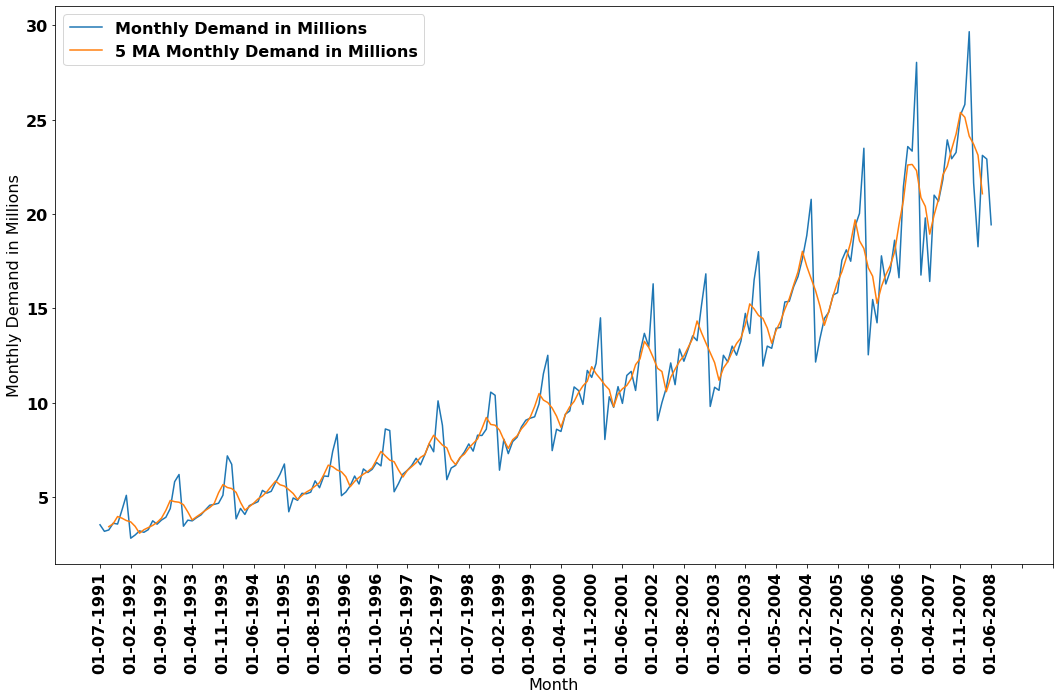

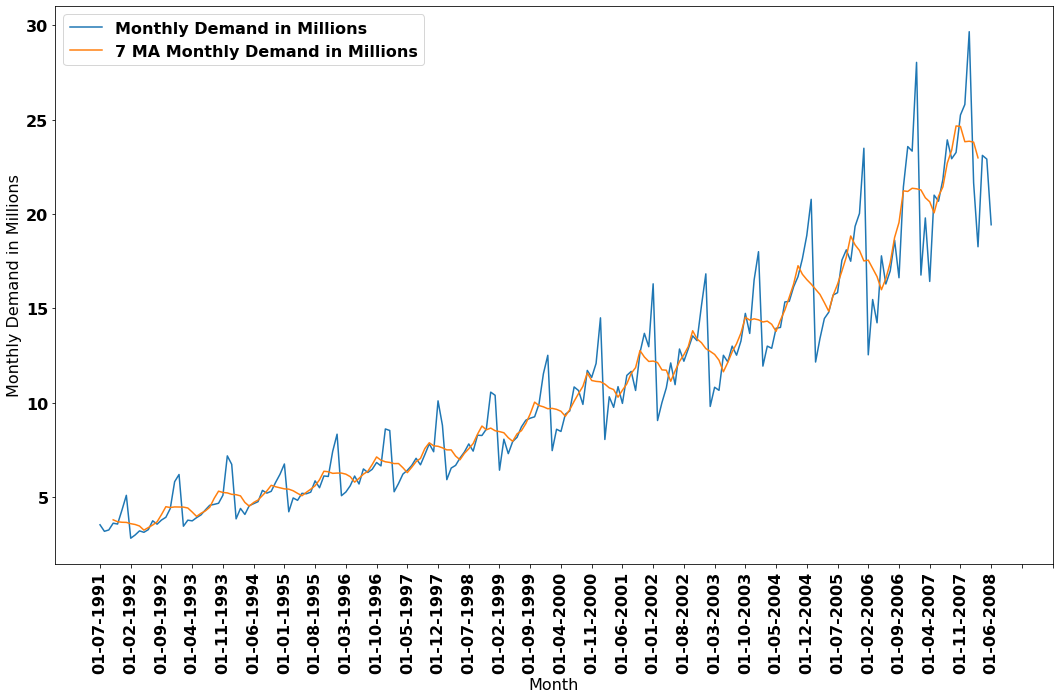

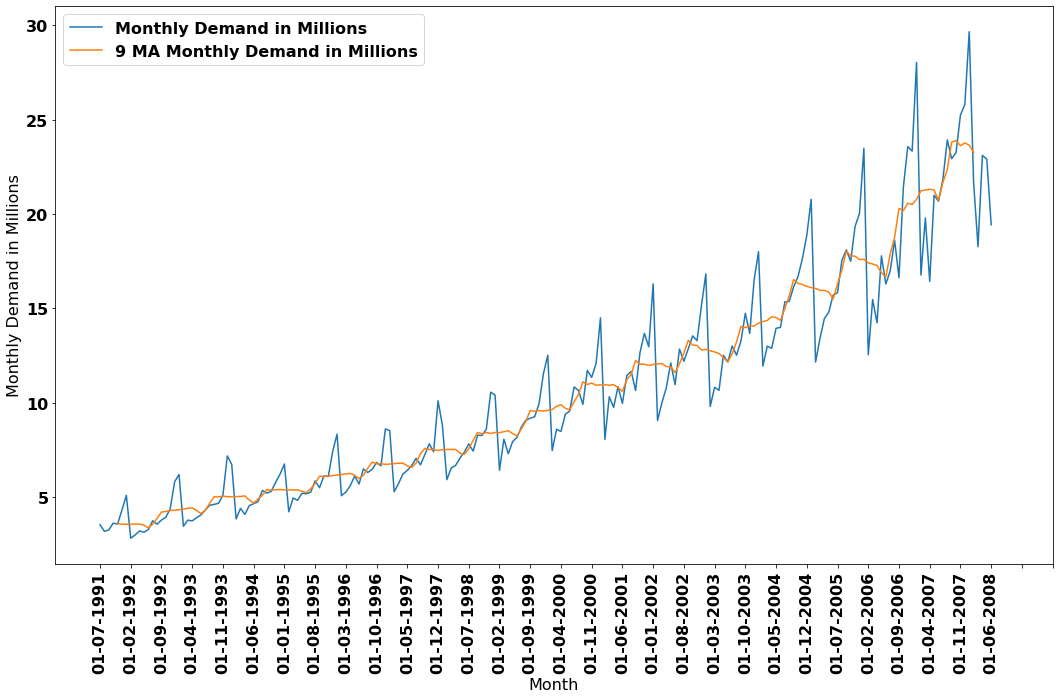

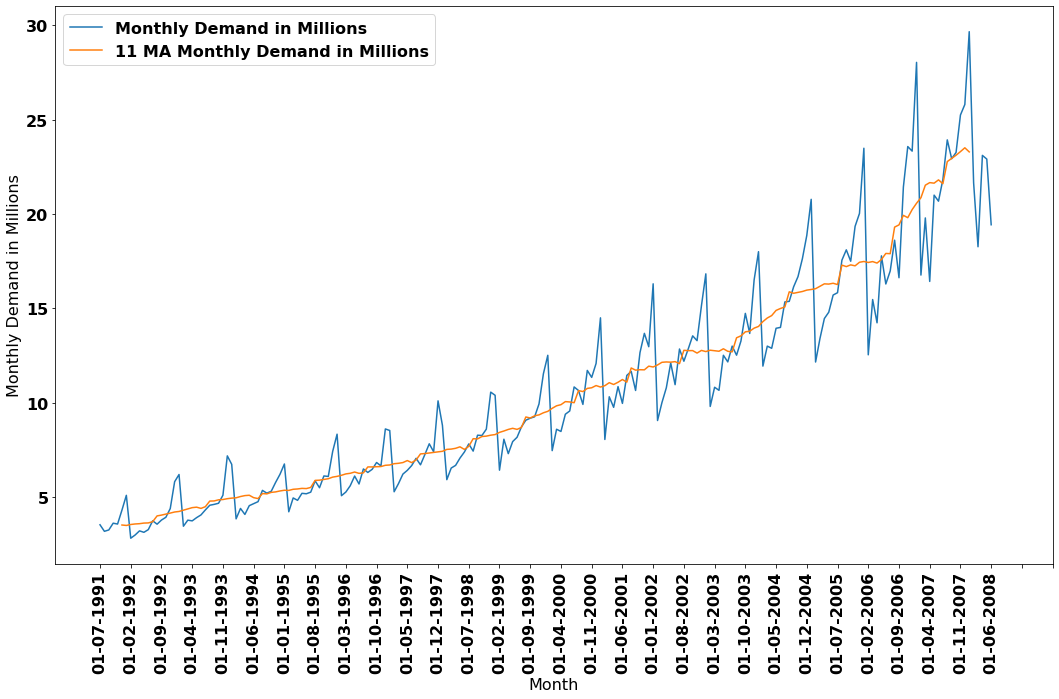

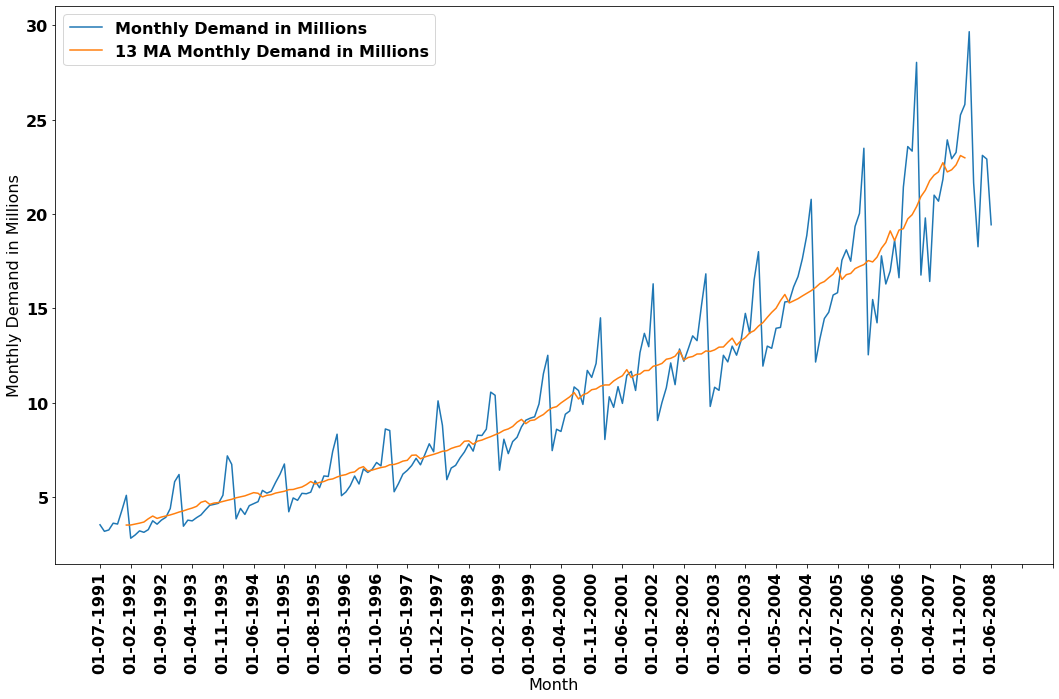

In [136]:
data = pd.read_csv("Monthly-Demand.csv", index_col="Month")

for m in range(5, 15, 2):
    column_name = "Monthly Demand in Millions"
    m_moving_average(data=data, m=m, column_name=column_name)
    plot_results(data, original_column_name=column_name, trend_column_name = " ".join([str(m),"MA",column_name]))

In [122]:
data.head(15)

,Monthly Demand in Millions,5 MA Monthly Demand in Millions,7 MA Monthly Demand in Millions,9 MA Monthly Demand in Millions,11 MA Monthly Demand in Millions,13 MA Monthly Demand in Millions
Month,,,,,,
01-07-1991,3.526591,NaN,NaN,NaN,NaN,NaN
01-08-1991,3.180891,NaN,NaN,NaN,NaN,NaN
01-09-1991,3.252221,3.427315,NaN,NaN,NaN,NaN
01-10-1991,3.611003,3.583271,3.790183,NaN,NaN,NaN
01-11-1991,3.565869,3.964760,3.688459,3.592401,NaN,NaN
01-12-1991,4.306371,3.877220,3.660590,3.556645,3.514906,NaN
01-01-1992,5.088335,3.752181,3.653813,3.550721,3.491627,3.513257
01-02-1992,2.814520,3.679963,3.584752,3.552754,3.542260,3.515733
01-03-1992,2.985811,3.444205,3.542560,3.566849,3.570129,3.561603


In [12]:
window_5 = list(range(-2, 3, 1)) # [-2, -1, 0, 1, 2]
k = int(len(window_5) / 2)
for y in range(k, no_of_rows-k):
    sum_12 = 0
    for t in window_5:
        if (y+t > no_of_rows):
            break
        sum_12 = sum_12 + data.loc[y+t, "Monthly Demand in Millions"]
    sum_12 = sum_12 / 12
    data.loc[y, "5MA"] = sum_12

In [16]:
data.tail()

,Month,Monthly Demand in Millions,5MA
199,01-02-2008,21.654285,9.874863
200,01-03-2008,18.264945,9.633731
201,01-04-2008,23.107677,8.780930
202,01-05-2008,22.912510,NaN
203,01-06-2008,19.431740,NaN


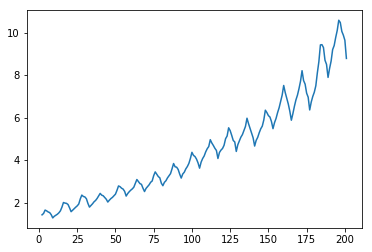

In [15]:
plt.plot(data["5MA"])

## 2) Find Trend using 2*12 MA

In [21]:
data = pd.read_csv("Monthly-Demand.csv")

In [22]:
no_of_rows = data.shape[0]

In [23]:
### Find 12 MA
# data["12MA"] = 0
window_12 = list(range(-5, 7, 1)) # [-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]

for y in range(5, no_of_rows-6):
    sum_12 = 0
    for t in window_12:
        if (y+t > no_of_rows):
            break
        sum_12 = sum_12 + data.loc[y+t, "Monthly Demand in Millions"]
    sum_12 = sum_12 / 12
    data.loc[y, "12MA"] = sum_12

In [24]:
window_12

[-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5, 6]

In [35]:
## Find 2 MA
# data["2*12 MA/Trend"] = 0
window_2 = [-1, 0]

for y in range(6, no_of_rows-6):
    sum_2 = 0
    for t in window_2:
        if (y+t > no_of_rows):
            break
        sum_2 = sum_2 + data.loc[y+t, "12MA"]
    sum_2 = sum_2 / 2
    data.loc[y, "2*12 MA/Trend"] = sum_2

In [36]:
data.head(18)

,Month,Monthly Demand in Millions,12MA,2*12 MA/Trend
0,01-07-1991,3.526591,NaN,NaN
1,01-08-1991,3.180891,NaN,NaN
2,01-09-1991,3.252221,NaN,NaN
3,01-10-1991,3.611003,NaN,NaN
4,01-11-1991,3.565869,NaN,NaN
5,01-12-1991,4.306371,3.494541,3.503344
6,01-01-1992,5.088335,3.512146,3.503344
7,01-02-1992,2.814520,3.543636,3.527891
8,01-03-1992,2.985811,3.587385,3.565511
9,01-04-1992,3.204780,3.613509,3.600447


In [30]:
## Find 2 MA
# data["2*12 MA/Trend"] = 0
window_2 = [-1, 0]

for y in range(6, no_of_rows-6):
    sum_2 = 0
    for t in window_2:
        if (y+t > no_of_rows):
            break
        sum_2 = sum_2 + data.loc[y+t, "12MA"]
    sum_2 = sum_2 / 2
    data.loc[y, "2*12 MA/Trend"] = sum_2

SyntaxError: invalid syntax (<ipython-input-30-905d85117c84>, line 3)

In [29]:
data

,Month,Monthly Demand in Millions,12MA,2*12 MA/Trend
0,01-07-1991,3.526591,NaN,NaN
1,01-08-1991,3.180891,NaN,NaN
2,01-09-1991,3.252221,NaN,NaN
3,01-10-1991,3.611003,NaN,NaN
4,01-11-1991,3.565869,NaN,NaN
5,01-12-1991,4.306371,3.494541,NaN
6,01-01-1992,5.088335,3.512146,3.527891
7,01-02-1992,2.814520,3.543636,3.565511
8,01-03-1992,2.985811,3.587385,3.600447
9,01-04-1992,3.204780,3.613509,3.647703


## 3 a) Detrend data ( Additive)

In [35]:
data["Additive deTrend"] = data["Monthly Demand in Millions"] - data["2*12 MA/Trend"]

## 4 a) Find additive seasonal component 

In [36]:
for mon in range(6, 18):
    no_of_years = 0
    sum_of_detrend = 0
    for step in range(0 , 199, 12):
        if mon+step >= 198:
            break
        sum_of_detrend += data.loc[mon + step,"Additive deTrend"]
        no_of_years = no_of_years + 1
    seasonality = sum_of_detrend / no_of_years
    
    for step in range(0 , 199, 12):
        if mon+step >= 198:
            break
        data.loc[mon + step, "Additive Seasonality"] = seasonality

## 5 a) Find additve residual component

In [37]:
data["Additive Residual"] = data["Monthly Demand in Millions"] - data["2*12 MA/Trend"] - data["Additive Seasonality"]

## 6 a) Plot results

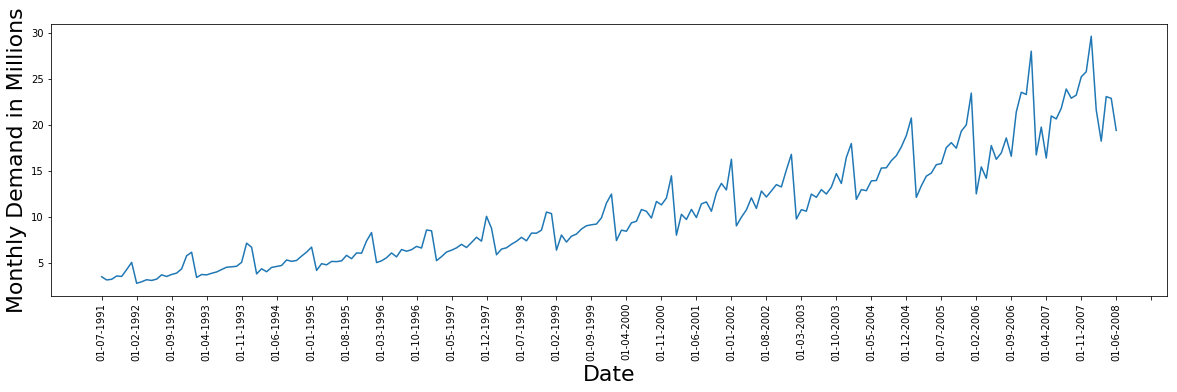

In [38]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["Monthly Demand in Millions"])
plt.ylabel("Monthly Demand in Millions", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

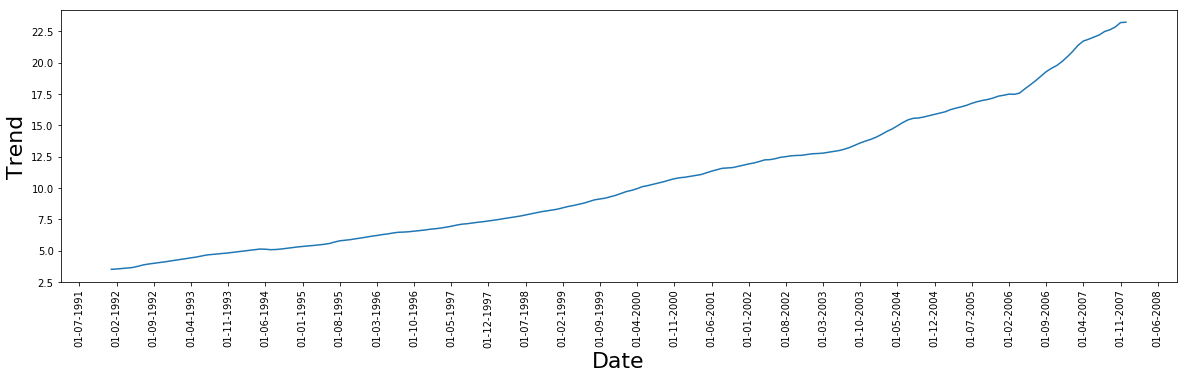

In [39]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["2*12 MA/Trend"])
plt.ylabel("Trend", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

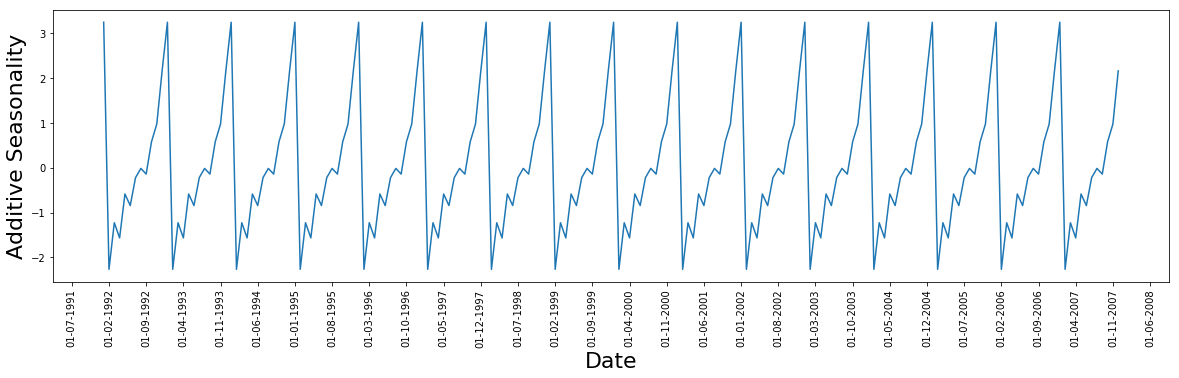

In [40]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["Additive Seasonality"])
plt.ylabel("Additive Seasonality", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

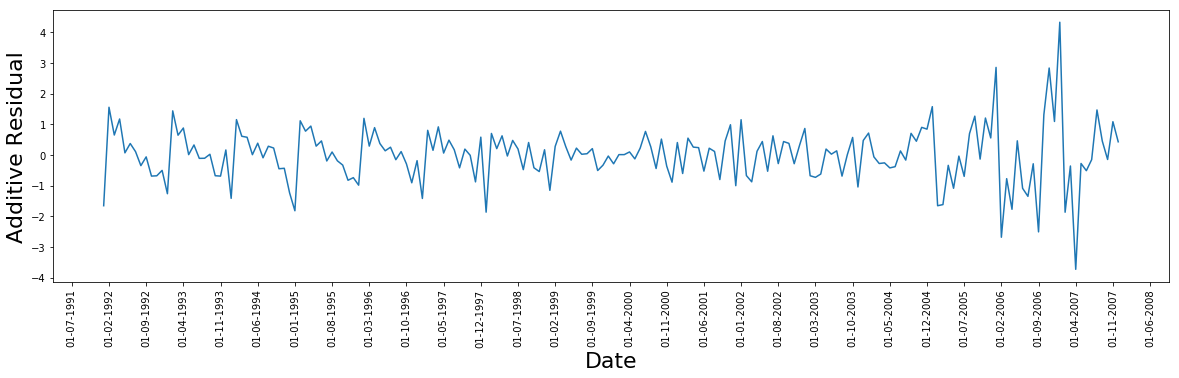

In [41]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["Additive Residual"])
plt.ylabel("Additive Residual", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

In [42]:
seas = seasonal_decompose(data.set_index("Month")["Monthly Demand in Millions"], model="additive", freq=12)

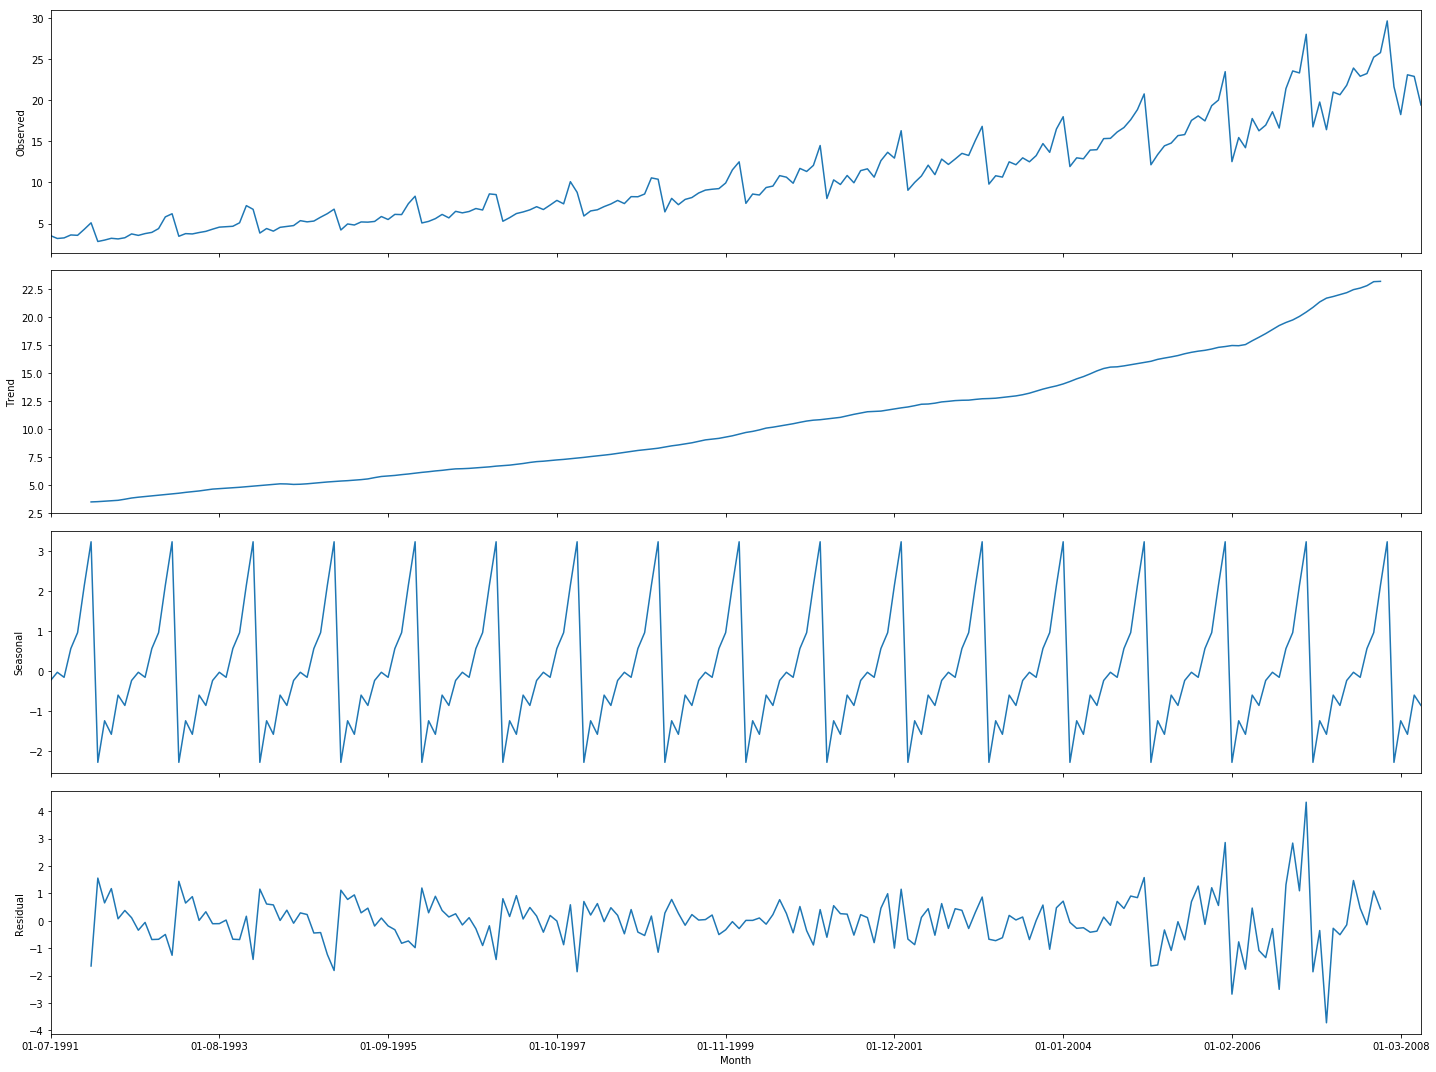

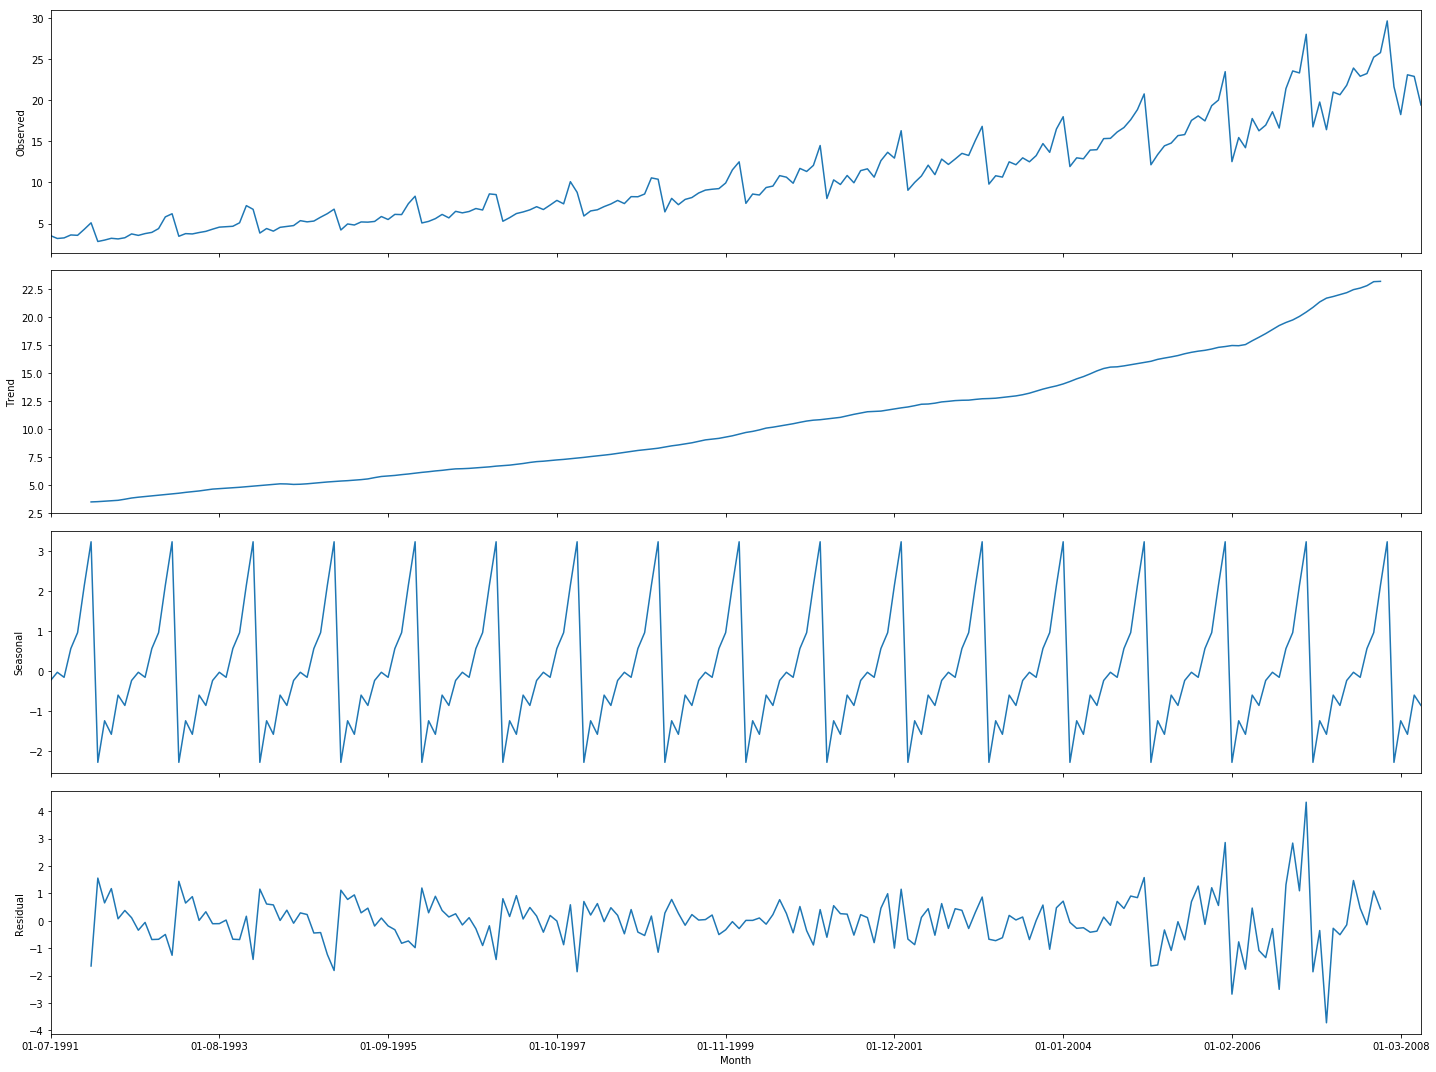

In [43]:
plt.rcParams['figure.figsize'] = 20, 15
seas.plot()

## 3 b) Detrend data ( Multiplicative)

In [44]:
data["Multiplicative deTrend"] = data["Monthly Demand in Millions"] / data["2*12 MA/Trend"]

## 4 b) Find multiplicative seasonal component 

In [45]:
for mon in range(6, 18):
    no_of_years = 0
    sum_of_detrend = 0
    for step in range(0 , 199, 12):
        if mon+step >= 198:
            break
#         print (data.loc[mon + step, "Multiplicative deTrend"])
        sum_of_detrend += data.loc[mon + step, "Multiplicative deTrend"]
        no_of_years = no_of_years + 1
    seasonality = sum_of_detrend / no_of_years
    
    for step in range(0 , 199, 12):
        if mon+step >= 198:
            break
        data.loc[mon + step, "Multiplicative Seasonality"] = seasonality

## 5 b) Find multiplicative residual component

In [46]:
data["Multiplicative Residual"] = data["Monthly Demand in Millions"] / (data["2*12 MA/Trend"] * data["Multiplicative Seasonality"])

In [47]:
data.head(10)

,Month,Monthly Demand in Millions,12MA,2*12 MA/Trend,Additive deTrend,Additive Seasonality,Additive Residual,Multiplicative deTrend,Multiplicative Seasonality,Multiplicative Residual
0,01-07-1991,3.526591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-08-1991,3.180891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-09-1991,3.252221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-10-1991,3.611003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-11-1991,3.565869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01-12-1991,4.306371,3.494541,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,01-01-1992,5.088335,3.512146,3.503344,1.584991,3.240828,-1.655836,1.452422,1.329808,1.092204
7,01-02-1992,2.814520,3.543636,3.527891,-0.713371,-2.266297,1.552926,0.797791,0.779121,1.023962
8,01-03-1992,2.985811,3.587385,3.565511,-0.579700,-1.228123,0.648423,0.837415,0.875893,0.956070
9,01-04-1992,3.204780,3.613509,3.600447,-0.395667,-1.565762,1.170095,0.890106,0.857302,1.038265


## 6 b) Plot Results

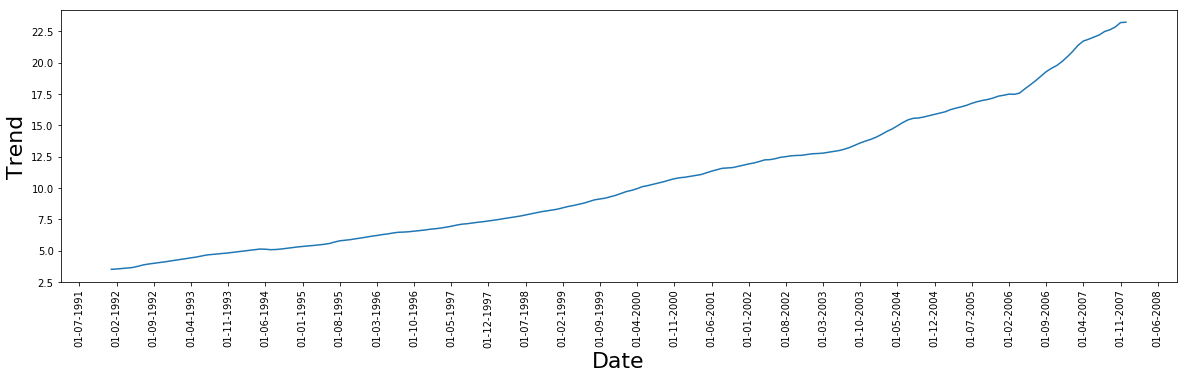

In [48]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["2*12 MA/Trend"])
plt.ylabel("Trend", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

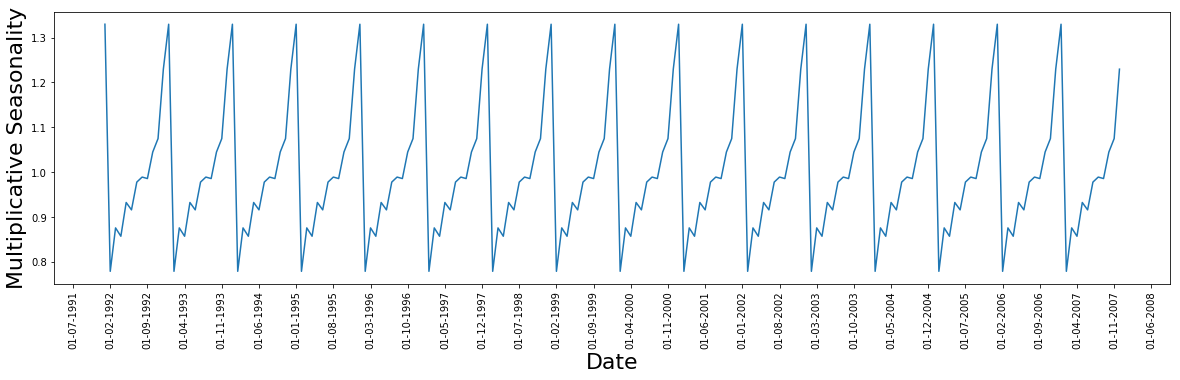

In [49]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["Multiplicative Seasonality"])
plt.ylabel("Multiplicative Seasonality", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

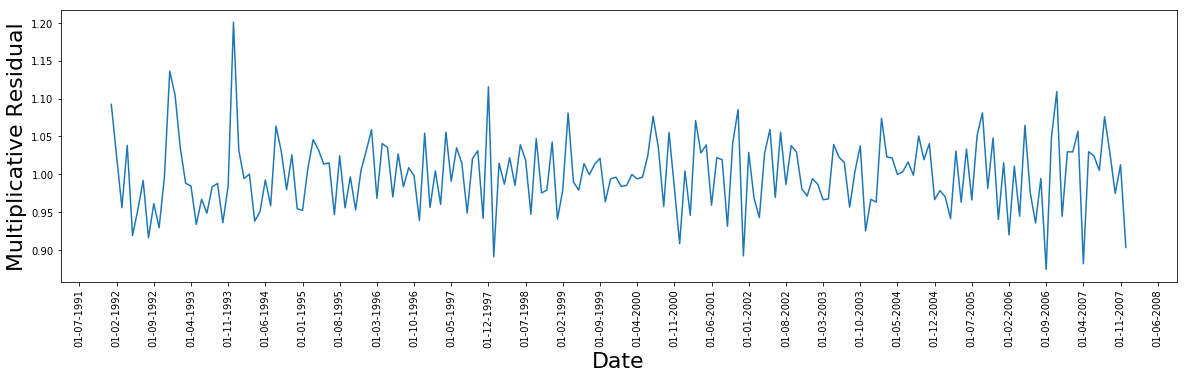

In [50]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(data["Month"], data["Multiplicative Residual"])
plt.ylabel("Multiplicative Residual", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')

In [20]:
seas = seasonal_decompose(data["Monthly Demand in Millions"], model="multiplicative", freq=12)

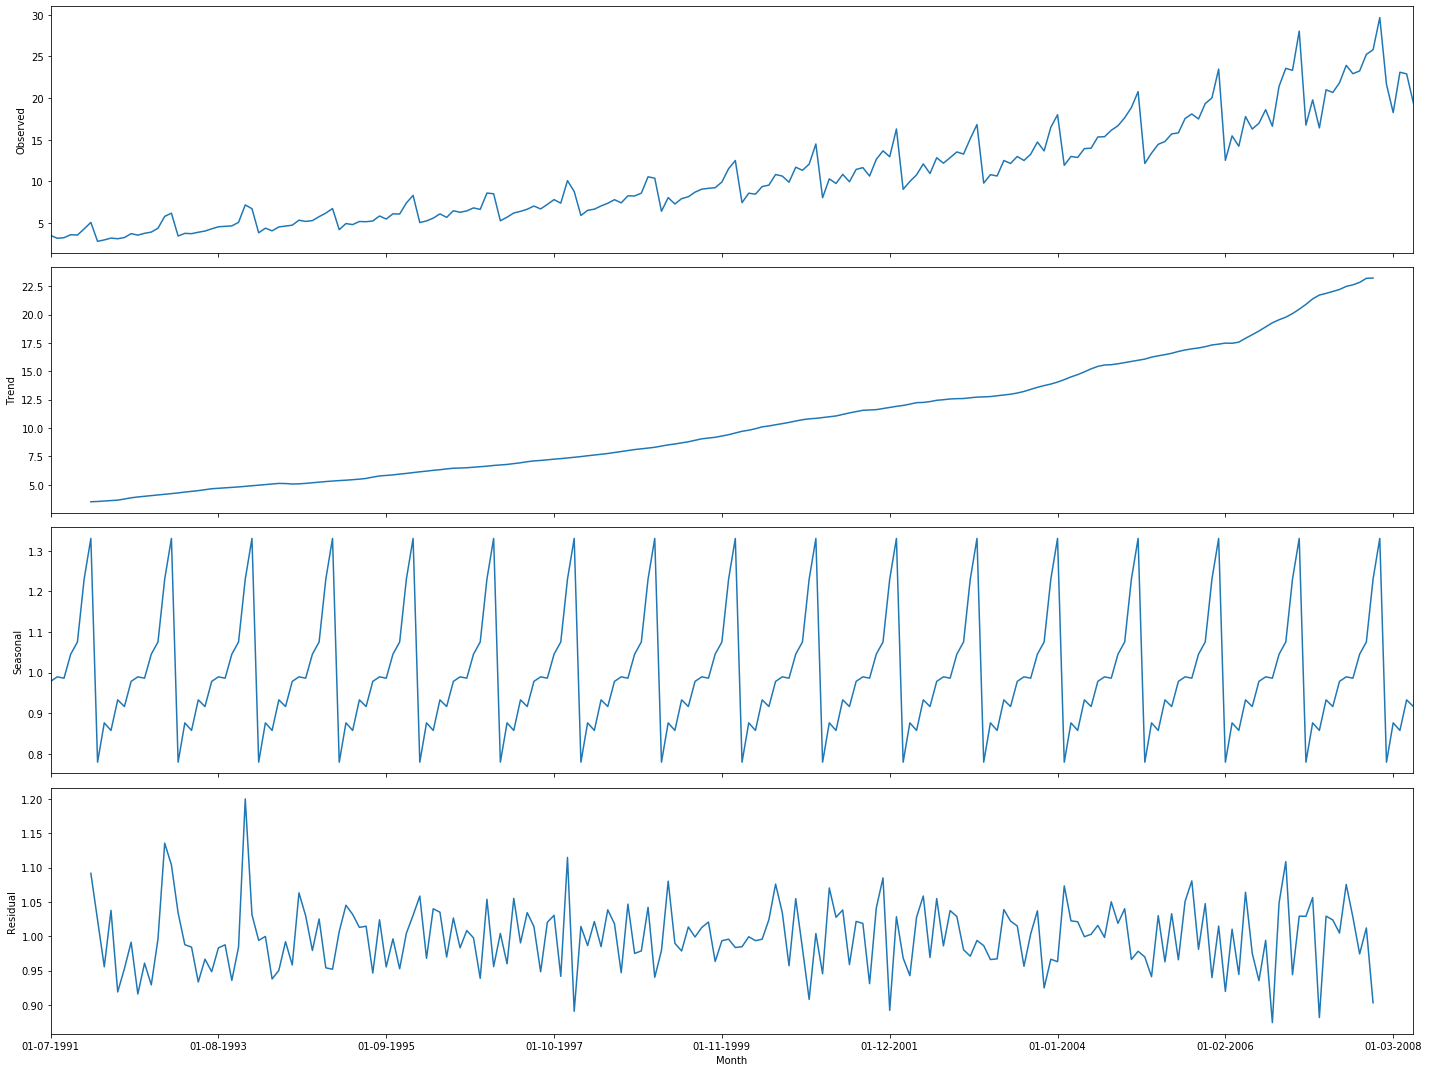

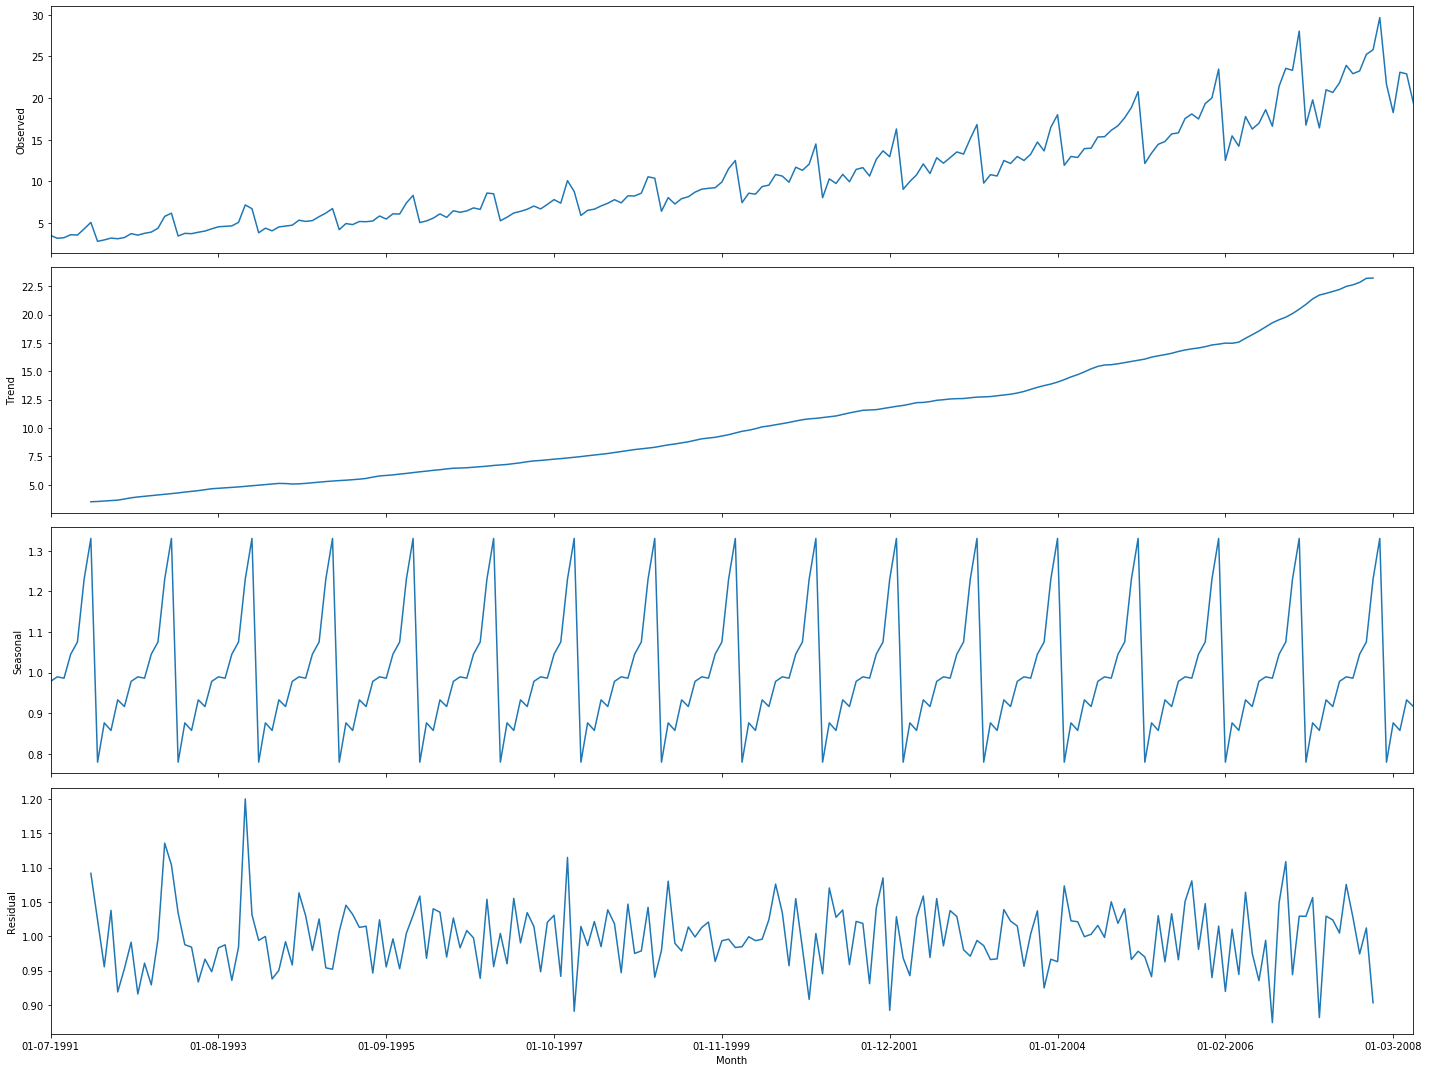

In [21]:
plt.rcParams['figure.figsize'] = 20, 15
seas.plot()

In [22]:
seas.trend

Month
01-07-1991          NaN
01-08-1991          NaN
01-09-1991          NaN
01-10-1991          NaN
01-11-1991          NaN
01-12-1991          NaN
01-01-1992     3.503344
01-02-1992     3.527891
01-03-1992     3.565511
01-04-1992     3.600447
01-05-1992     3.647703
01-06-1992     3.744571
01-07-1992     3.853234
01-08-1992     3.925737
01-09-1992     3.985022
01-10-1992     4.039856
01-11-1992     4.094329
01-12-1992     4.159203
01-01-1993     4.215740
01-02-1993     4.281620
01-03-1993     4.358073
01-04-1993     4.423690
01-05-1993     4.484135
01-06-1993     4.570665
01-07-1993     4.650199
01-08-1993     4.688942
01-09-1993     4.731116
01-10-1993     4.771233
01-11-1993     4.811912
01-12-1993     4.863211
                ...    
01-01-2006    17.394550
01-02-2006    17.486559
01-03-2006    17.469058
01-04-2006    17.571394
01-05-2006    17.911470
01-06-2006    18.225268
01-07-2006    18.552543
01-08-2006    18.918317
01-09-2006    19.274676
01-10-2006    19.546322
01-11-2006

#### Airline Passenger data

In [56]:
airline = pd.read_csv("airpassenger.csv")

In [59]:
airline.columns

Index(['Date', 'Number Of Passengers'], dtype='object')

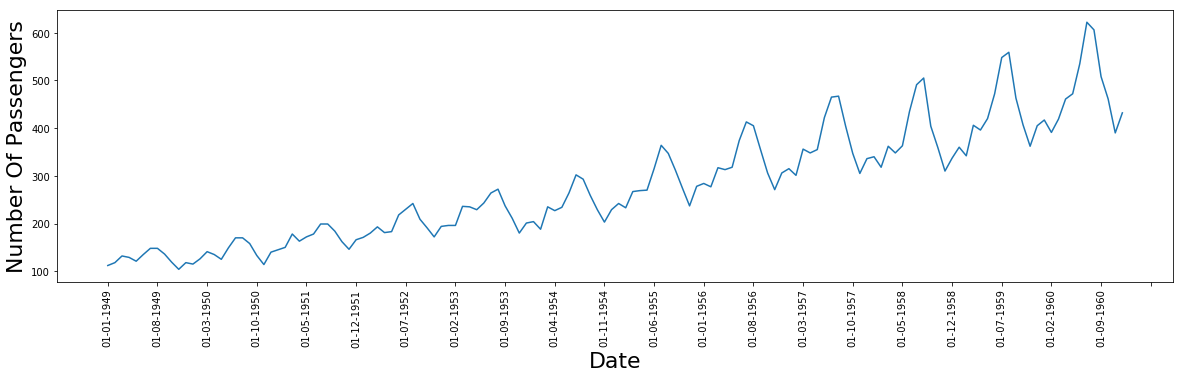

In [63]:
plt.rcParams['figure.figsize'] = 20,5
plt.plot(airline["Date"], airline["Number Of Passengers"])
plt.ylabel("Number Of Passengers", fontsize=22)
plt.xlabel("Date", fontsize=22)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical")
plt.locator_params(axis='x')
plt.savefig("Multiplicative-airline.png")

### Australia beer 

In [70]:
ausbeer = pd.read_csv("ausbeer.csv")

In [71]:
ausbeer.columns

Index(['Date', 'Total quarterly beer production in Australia (in megalitres)'], dtype='object')

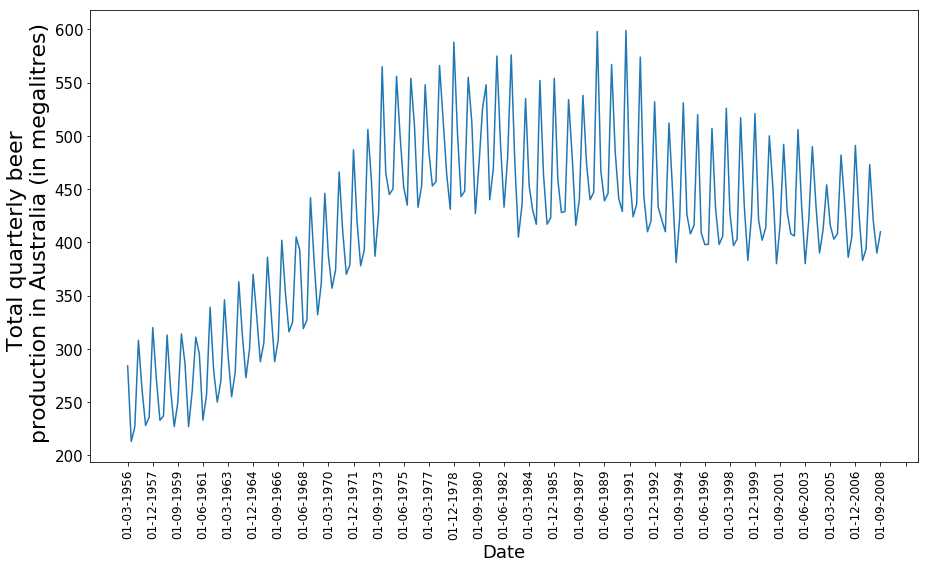

In [89]:
plt.rcParams['figure.figsize'] = 13, 8
plt.plot(ausbeer["Date"], ausbeer['Total quarterly beer production in Australia (in megalitres)'])
plt.ylabel('Total quarterly beer \n production in Australia (in megalitres)', fontsize=22)
plt.xlabel("Date", fontsize=18)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical", size=12)
plt.yticks(size=15)
plt.locator_params(axis='x')
plt.tight_layout()
plt.savefig("Additive-beer.png")

## Antidiabetic

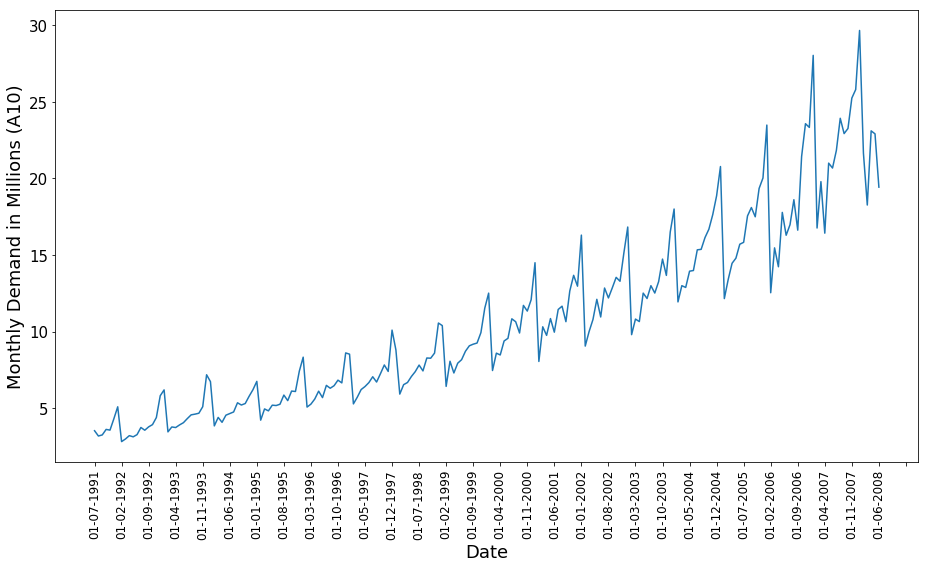

In [90]:
plt.rcParams['figure.figsize'] = 13, 8
plt.plot(data["Month"], data["Monthly Demand in Millions"])
plt.ylabel("Monthly Demand in Millions (A10)", fontsize=18)
plt.xlabel("Date", fontsize=18)
plt.xticks(np.arange(0, 220, step=7), rotation="vertical", size=12)
plt.yticks(size=15)
plt.locator_params(axis='x')
plt.tight_layout()
plt.savefig("Antidiabetic-multiplicative.png")

In [94]:
data.columns

Index(['Month', 'Monthly Demand in Millions', '12MA', '2*12 MA/Trend',
       'Additive deTrend', 'Additive Seasonality', 'Additive Residual',
       'Multiplicative deTrend', 'Multiplicative Seasonality',
       'Multiplicative Residual'],
      dtype='object')

In [96]:
data_only_ts = data[
    [    'Month', 
    'Monthly Demand in Millions'
]
]

In [98]:
data_only_ts.set_index('Month')

,Monthly Demand in Millions
Month,
01-07-1991,3.526591
01-08-1991,3.180891
01-09-1991,3.252221
01-10-1991,3.611003
01-11-1991,3.565869
01-12-1991,4.306371
01-01-1992,5.088335
01-02-1992,2.814520
01-03-1992,2.985811
